In [ ]:
"""
Project 4 README
=====================================

Name:
Real-World Data; Covariance, Correlation, and Confidence Intervals

Purpose:

Use the scikit-learn module to obtain the data and split 
it into training and test sets, and NumPy to run linear regression. 
We will then use the Boston house prices dataset to try and predict 
the median value of a home given several features of its neighborhood.

Authors:

Brandon Ryan, Yi Wei Lee, Mina Moslehpour

Last modified by Brandon Ryan, November 11 2020

Experiments:
1. Load and examine the California dataset’s features, target values, and description.

2. Recall that when we originally discussed housing prices, we suggested that the price of a house might depend on how many bedrooms it has. 
Create and fit() an sklearn.linear_model. LinearRegression model using AveBedrms as a predictor of MedHouseVal. 
How well does the model score()?

3. Let’s take a closer look at the data. Seaborn’s pairplot() function can be used to plot pairs of features against each other.
Plot MedHouseVal as a function of each of the features.

4. Because of the size of the dataset, graphs produced by Seaborn are rather crowded.
Try the plot again using a sample() of 1%. How does the distribution of AveBedrms seem to affect MedHouseVal?

5. Which features seem to have a linear relationship with MedHouseVal?

6. What interesting relationship do you see between MedHouseVal and the Latitude and Longitude? Look these values up on a map of the state.
(If you are feeling particularly ambitious, you might try plotting the values on a map.)

7. Recall that the covariance matrix shows how pairs of features in a dataset co-vary. 
What patterns (if any) do you observe? (Hint: use describe() to examine distribution of the features before attempting to interpret the results.)

8. Covariance is difficult to interpret because the features are on very different scales.
While you could standardize the features yourself, the correlation matrix is the covariance matrix of the standardized variables.
Based on the correlation matrix, which features is the best predictor of MedHouseVal?

9. Repeat experiment (2) using the feature you found in experiment (8) instead of AveBedrms. How well does this model score?

10. Another way to visualize the predictive value of the two features is to compare the variance.
The seaborn.regplot() function can be used to create a scatter plot,
add a regression line, and plot a 95% confidence interval in a single step. (Recall that 95% corresponds to ±2𝜎.)
Plot AveBedrms as a predictor of MedHouseVal, then use the feature you found in experiment (8).
What difference do you see? (Don’t forget to use the sample you created in experiment (4), or your graph will be difficult to interpret.)

11. Other than the feature you found in experiment (8), there is only a very weak relationship between MedHouseVal and the other features.
Fit and score a model to predict MedHouseVal using all the features. Are you surprised by the result?
What accounts for the difference from experiment (9)?


Platforms:

Jupyter Notebook

Libraries:

scikit-learn 
pandas
Matplotlib’s
numpy

"""

'\nProject 4 README\n=====================================\n\nName:\nReal-World Data; Covariance, Correlation, and Confidence Intervals\n\nPurpose:\n\nUse the scikit-learn module to obtain the data and split \nit into training and test sets, and NumPy to run linear regression. \nWe will then use the Boston house prices dataset to try and predict \nthe median value of a home given several features of its neighborhood.\n\nAuthors:\n\nBrandon Ryan, Yi Wei Lee, Mina Moslehpour\n\nLast modified by Brandon Ryan, November 11 2020\n\nExperiments:\n1. Load and examine the California dataset’s features, target values, and description.\n\n2. Recall that when we originally discussed housing prices, we suggested that the price of a house might depend on how many bedrooms it has. \nCreate and fit() an sklearn.linear_model. LinearRegression model using AveBedrms as a predictor of MedHouseVal. \nHow well does the model score()?\n\n3. Let’s take a closer look at the data. Seaborn’s pairplot() function 

### 1. Load and examine the California dataset’s features, target values, and description.



In [ ]:
import numpy as np
import matplotlib.pyplot as plotter
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import model_selection
from seaborn import regplot
%matplotlib inline

cal_housing = fetch_california_housing()
df_housing = pd.DataFrame(data=cal_housing.data, columns=cal_housing.feature_names)
print("Head: ")
df_housing.head()



Head: 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
print("Describe:")
df_housing.describe()

Describe:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df_target = pd.DataFrame(data=cal_housing.target, columns=['MedHouseVal'])
df_target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
df_housing['MedHouseVal'] = df_target

df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2.Recall that when we originally discussed housing prices, we suggested that the price of a house might depend on how many bedrooms it has. Create and fit() an sklearn.linear_model. LinearRegression model using AveBedrms as a predictor of MedHouseVal. How well does the model score()?

In [ ]:
X = df_housing['AveBedrms'].values
Y = df_target['MedHouseVal'].values

#print("X Shape", X.shape)
#print("Y Shape", Y.shape)

#Reshape X and Y

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

#print("X reshape", X.shape)
#print("Y reshape", Y.shape)

model = LinearRegression()

model.fit(X,Y)
print("Score:", model.score(X,Y))

Score: 0.0021809379116133343


The model scores poorly as expected since the sns pairplot shows the relationship to be a vertical line, indicating that AveBedrms does a very poor job of predicting the MedHouseVal. This is also verified by the horrible score of nearly 0.002.

### 3.Let’s take a closer look at the data. Seaborn’s pairplot() function can be used to plot pairs of features against each other. Plot MedHouseVal as a function of each of the features.

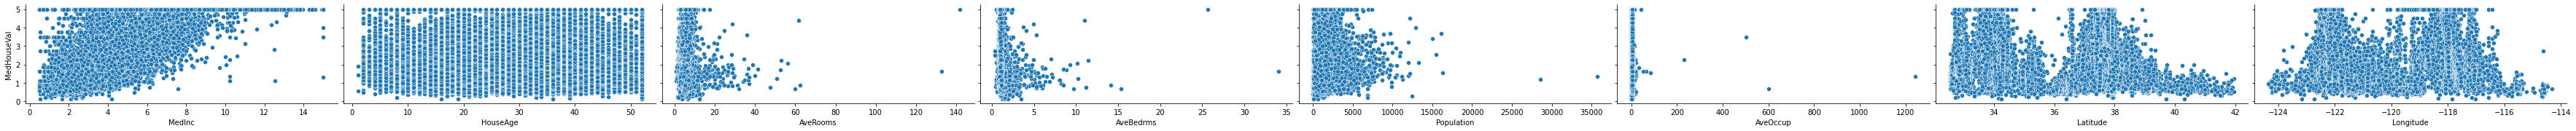

In [ ]:
import seaborn as sns

df_housing_plot = pd.DataFrame(data= np.c_[cal_housing['data'], cal_housing['target']], columns= cal_housing['feature_names'] + ['MedHouseVal'])

sns.pairplot(df_housing_plot, x_vars= ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'],y_vars=['MedHouseVal'], diag_kind=None, height=2.5, aspect=2.5)

#sns.pairplot(df_housing_plot, x_vars= ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'],y_vars=['MedHouseVal'], diag_kind=None, height=2.5, aspect=2.5)
#sns.pairplot(df_housing_plot, y_vars= X_test,x_vars=X_train, height=2.5, aspect=2.5)


###4. Because of the size of the dataset, graphs produced by Seaborn are rather crowded. Try the plot again using a sample() of 1%. How does the distribution of AveBedrms seem to affect MedHouseVal?


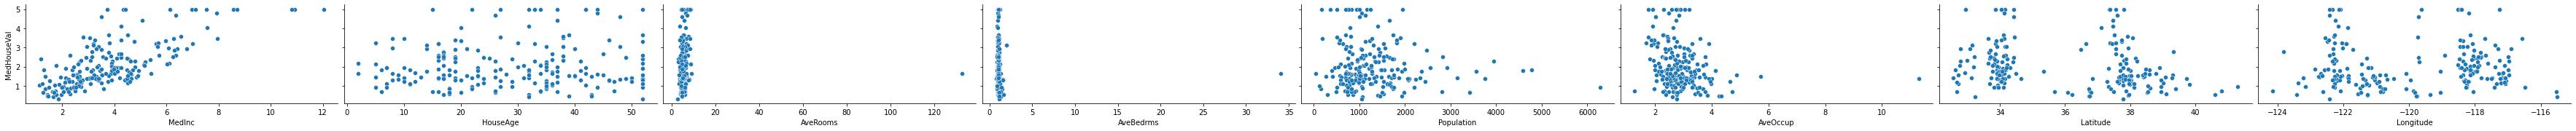

In [ ]:
#where's the updated plot?

#sample = df_housing['AveBedrms'].sample(frac=0.01, weights=df_housing['MedHouseVal'], replace= True)
#sample1 = df_housing['MedHouseVal'].sample(frac=0.01, weights=df_housing['MedHouseVal'], replace= True)
#print(sample.shape, sample1.shape)

sample = df_housing_plot.sample(frac=0.01, replace=True, random_state=1)
sns.pairplot(sample, x_vars= ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'],y_vars=['MedHouseVal'], diag_kind=None, height=2.5, aspect=2.5)


###5. Which features seem to have a linear relationship with MedHouseVal?

MedInc has a linear relationship with MedHouseVal as seen in the above graph.

### 6.What interesting relationship do you see between MedHouseVal and the Latitude and Longitude? Look these values up on a map of the state. (If you are feeling particularly ambitious, you might try plotting the values on a map.)

The Latitude and MedHouseVal show that if the latitude is more north than that of the MedHouseVal lower than the latitude in south, and in the 37 North that have higher MedHouseVal in the map that show the place is in the San Jose or near it.
Then another have higher MedHouseVal is in 34~36 North , correspond to the map that  is in Los Angeles to San Luis Obispo.

For the Longitude and MedHousVal we can see -122 is correspond to map 122W that are near San Jose and other place near it, then -118 is correspond to map 118W, so this mean the MedHouseVal will have lower price is near Nevada or Arizona.

### 7. Recall that the covariance matrix shows how pairs of features in a dataset co-vary. What patterns (if any) do you observe? (Hint: use describe() to examine distribution of the features before attempting to interpret the results.)





In [ ]:
#(7)-(8) where's the interpretation of the results? 
pd.set_option("display.max_rows", None, "display.max_columns", None)
co_vary = df_housing.cov()
print("co-vary")
print(co_vary)
print("examine distribution")
co_vary.describe()

co-vary
                MedInc     HouseAge    AveRooms  AveBedrms    Population  \
MedInc        3.609323    -2.846140    1.536568  -0.055858  1.040098e+01   
HouseAge     -2.846140   158.396260   -4.772882  -0.463718 -4.222271e+03   
AveRooms      1.536568    -4.772882    6.121533   0.993868 -2.023337e+02   
AveBedrms    -0.055858    -0.463718    0.993868   0.224592 -3.552723e+01   
Population   10.400979 -4222.270582 -202.333712 -35.527225  1.282470e+06   
AveOccup      0.370289     1.724298   -0.124689  -0.030424  8.217120e+02   
Latitude     -0.323860     0.300346    0.562235   0.070575 -2.631378e+02   
Longitude    -0.057765    -2.728244   -0.136518   0.012670  2.263778e+02   
MedHouseVal   1.508475     1.533988    0.433826  -0.025539 -3.221249e+01   

               AveOccup    Latitude   Longitude  MedHouseVal  
MedInc         0.370289   -0.323860   -0.057765     1.508475  
HouseAge       1.724298    0.300346   -2.728244     1.533988  
AveRooms      -0.124689    0.562235   -0.1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,1.571335,-452.347408,-21.968864,-3.866784,1.420859e+05,103.482335,-29.136235,24.830035,-3.130691
std,3.741177,1414.705738,67.693605,11.878966,4.276467e+05,271.678216,87.776951,75.612004,10.932992
min,-2.846140,-4222.270582,-202.333712,-35.527225,-4.222271e+03,-0.284494,-263.137814,-3.957054,-32.212487
25%,-0.057765,-2.846140,-0.136518,-0.055858,-2.023337e+02,-0.030424,-0.355326,-0.136518,-0.284494
50%,0.370289,-0.463718,0.433826,-0.025539,-3.221249e+01,0.052492,0.052492,-0.057765,-0.025539
75%,1.536568,1.533988,0.993868,0.070575,2.263778e+02,1.724298,0.300346,0.051519,1.331615
max,10.400979,158.396260,6.121533,0.993868,1.282470e+06,821.712002,4.562293,226.377839,1.533988


What patterns (if any) do you observe?

One pattern that stands out dramatically is how population varies wildly with any feature that is co-varied with.

### 8. Covariance is difficult to interpret because the features are on very different scales. While you could standardize the features yourself, the correlation matrix is the covariance matrix of the standardized variables. Based on the correlation matrix, which features is the best predictor of MedHouseVal?

In [ ]:
# where's the interpretation of the results?

from sklearn import preprocessing

X_train = df_housing
X_scale = preprocessing.scale(X_train)

X_scale

df = pd.DataFrame(X_scale,columns=cal_housing.feature_names+['MedHouseVal'])

df.corr(method='pearson')

#print(data1)
#data_scale = pd.DataFrame(data=data1,columns=df_housing.feature_name)
#print(data_scale)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Based on the correlation matrix, which features is the best predictor of MedHouseVal?

The best predictor of MedHouseVal is MedInc with the highest correlation score of 0.688075

### 9. Repeat experiment (2) using the feature you found in experiment (8) instead of AveBedrms. How well does this model score?


In [ ]:
#R^2 of 1.0 means you've done something wrong. Did yu remove the target from the feature set X_2? 

X_2 = df_housing['MedInc'].values
Y_2 = df_target['MedHouseVal'].values

#print("X Shape", X.shape)
#print("Y Shape", Y.shape)

#Reshape X and Y

X_2 = X_2.reshape(-1,1)
Y_2 = Y_2.reshape(-1,1)

#print("X reshape", X.shape)
#print("Y reshape", Y.shape)

model = LinearRegression()

model.fit(X_2,Y_2)
print("Score:", model.score(X_2,Y_2))

Score: 0.473447491807199


This model scores fairly well since on a scale of 0.0 to 1.0 it scores a 0.47.

###10. Another way to visualize the predictive value of the two features is to compare the variance.The seaborn.regplot() function can be used to create a scatter plot,add a regression line, and plot a 95% confidence interval in a single step. (Recall that 95% corresponds to ±2𝜎.)Plot AveBedrms as a predictor of MedHouseVal, then use the feature you found in experiment (8).What difference do you see? (Don’t forget to use the sample you created in experiment (4), or your graph will be difficult to interpret.)


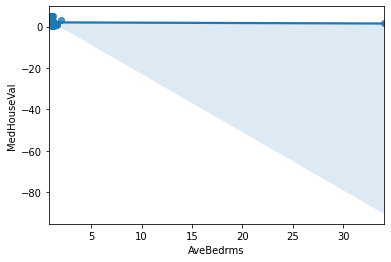

In [ ]:
#These graphs look the same because they're both using AveBedrms. You never decided on a better predictor in (8). 

#print(sample)
# CI is set to 95% by default
regplot(x=sample["AveBedrms"], y=sample["MedHouseVal"], data=sample, fit_reg=True, ci=95)


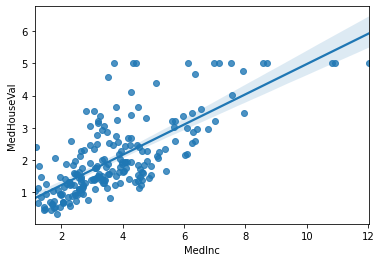

In [ ]:
regplot(x=sample['MedInc'], y=sample['MedHouseVal'], data=sample, fit_reg=True, ci=95)

The difference between the two graphs that I see are that the one using AveBedrms has a trendline which is horizontal, indicating that there is no correlation between the feature AveBedrms and MedHouseVal. The graph using MedInc as a predictor, however, has a linear relationship between the two features MedInc and MedHouseVal. This indicates that their exists a fairly strong correlation between the two features.

### 11. Other than the feature you found in experiment (8), there is only a very weak relationship between MedHouseVal and the other features.Fit and score a model to predict MedHouseVal using all the features. Are you surprised by the result? What accounts for the difference from experiment (9)?


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

##How is it that you're purporting to explain the results when you didn't actually do the experiment?
df_housing = df_housing.drop(columns=['MedHouseVal'])

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_housing, df_target, test_size=0.33, random_state=1)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Score:", model.score(X_train, y_train))

Score: 0.609991764648505


This is not surprising since the addition of multiple features in the model will make it more accurate, the model scoring roughly 0.61 as opposed to experiment 9 where the model scored only 0.47. What accounts for this difference from experiment 9 was that the data used to create the model was from a singular source as opposed to the entire set of features in experiment 11 which made the model a better predictor of MedHouseVal.